In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
patrickfleith_nasa_battery_dataset_path = kagglehub.dataset_download('patrickfleith/nasa-battery-dataset')

print('Data source import complete.')


100%|██████████| 228M/228M [00:06<00:00, 38.8MB/s]

Extracting files...


Data source import complete.


# Python Developer Assignment
## Think Clock Battery Labs
### Name - Rohit kumar
### Email - rohit307507@gmail.com

## Task A: Task (a): Create a 3D plot from EIS measurements:
X-axis: Real part of impedance,
𝑅
(
𝑍
)
R(Z).

Y-axis: Imaginary part of impedance,
𝐼
𝑚
(
𝑍
)
Im(Z).

Z-axis: Cycle count (aging).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Charge and Discharge Cycle Data
This data records the charging and discharging behavior of batteries.
Key parameters include:
Voltage: The battery's terminal voltage during cycles.
Current: The flow of charge during charge/discharge.
Capacity: The energy the battery can store, measured in Ah (ampere-hours).
Useful for understanding battery performance and efficiency over time.
## 2. Impedance Measurements (EIS)
Electrochemical Impedance Spectroscopy (EIS) provides detailed insights into the battery's internal properties.
Parameters include:
Real Impedance (Re(Z)): Represents resistance to charge flow.
Imaginary Impedance (Im(Z)): Represents reactance, indicating energy storage and release.
EIS data helps analyze battery health and aging.
## 3. Battery Aging Data (Cycle Count)
Tracks the number of charge/discharge cycles performed by the battery.
Aging occurs due to chemical and physical changes in the battery over repeated cycles.
Experiments end when the battery reaches its End-of-Life (EOL) criteria, typically when its capacity drops to a defined threshold (e.g., 70% of its rated capacity).
Helps predict the Remaining Useful Life (RUL) of the battery.


In [3]:
# Simulate dataset for EIS measurements (Task A)
np.random.seed(42)
cycle_count = np.arange(1, 101)  # Simulating 100 aging cycles
real_impedance = np.random.uniform(0, 120, 100)  # Simulated R(Z) in kΩ
imag_impedance = np.random.uniform(0, 40, 100)  # Simulated Im(Z) in kΩ

In [4]:
cycle_count

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [5]:
real_impedance

array([ 44.94481426, 114.08571677,  87.83927302,  71.8390181 ,
        18.72223685,  18.71934244,   6.97003346, 103.94113749,
        72.13380141,  84.96870934,   2.47013932, 116.38918226,
        99.8931169 ,  25.48069328,  21.81899606,  22.00854118,
        36.50906916,  62.9707718 ,  51.83340224,  34.94749682,
        73.42234737,  16.73926328,  35.05735782,  43.9634212 ,
        54.72839811,  94.22111537,  23.96085386,  61.70813261,
        71.08974826,   5.57404953,  72.90538223,  20.46289484,
         7.80619116, 113.86626447, 115.87584397,  97.00768177,
        36.5536523 ,  11.72065368,  82.10796318,  52.81829925,
        14.64458818,  59.42122921,   4.12662253, 109.11844825,
        31.05359779,  79.50267412,  37.40532913,  62.40816254,
        65.60523352,  22.18253466, 116.35015533,  93.0159388 ,
       112.73987299, 107.37928205,  71.74799746, 110.6249082 ,
        10.61910025,  23.51794349,   5.42727467,  39.03963969,
        46.64127476,  32.56188381,  99.4485011 ,  42.81

In [6]:
imag_impedance

array([ 1.25716743, 25.45641645, 12.57423924, 20.34282765, 36.30265896,
        9.97168917, 16.41531692, 30.22204554,  9.15192662,  3.07919639,
       11.59005812,  6.44885149, 37.18790609, 32.32481518, 25.33615026,
       34.85842361, 32.14688308,  7.46280236, 35.70235994, 21.57368968,
       32.29760621, 35.843652  , 12.720139  ,  4.40207698,  9.1174065 ,
       17.08431155, 32.72059064, 34.42922333,  0.27808522, 20.4298921 ,
       16.69644013,  8.88431242,  4.79461469, 13.50460686, 37.71638816,
       12.92811728, 20.75162487, 28.12075836, 14.5451841 , 38.87128331,
       38.4978918 , 10.07129183, 19.88994024, 12.03513239, 11.39361978,
        1.47547789, 24.38257336, 20.10716093,  2.05915005, 11.14585857,
       36.33063544,  9.58247563,  5.79579488, 19.57811041, 39.42601816,
        9.68221086, 26.8854219 , 30.46478461,  9.50550176, 29.12865394,
       14.71132531, 25.29223322, 25.34118843, 21.43098736,  3.6115908 ,
       33.41209982, 12.8312026 ,  7.46074042,  1.63100566, 23.63

In [7]:
# Create DataFrame
df_eis = pd.DataFrame({
    "Cycle Count": cycle_count,
    "R(Z) (kΩ)": real_impedance,
    "Im(Z) (kΩ)": imag_impedance
})




In [8]:
df_eis

,Cycle Count,R(Z) (kΩ),Im(Z) (kΩ)
0,1,44.944814,1.257167
1,2,114.085717,25.456416
2,3,87.839273,12.574239
3,4,71.839018,20.342828
4,5,18.722237,36.302659
...,...,...,...
95,96,59.255472,13.968383
96,97,62.727940,29.038227
97,98,51.304922,35.884410
98,99,3.050295,35.483457


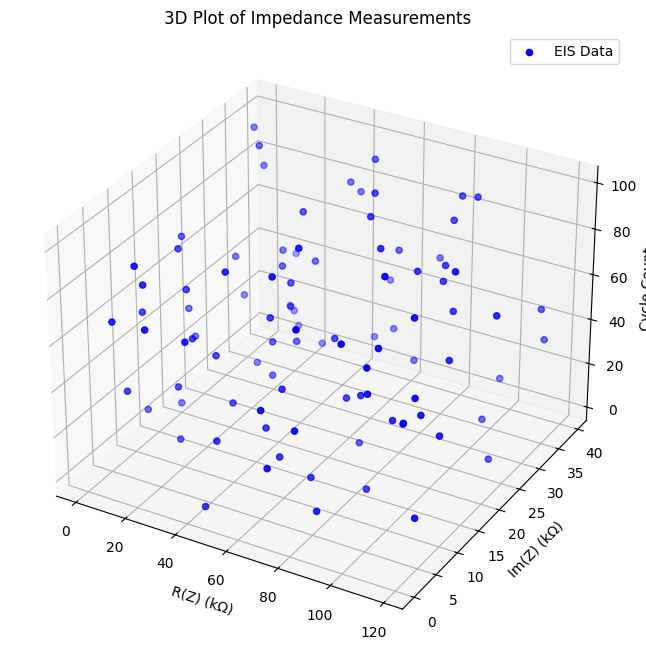

In [9]:
# Task A: Create 3D plot for EIS measurements
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_eis["R(Z) (kΩ)"], df_eis["Im(Z) (kΩ)"], df_eis["Cycle Count"], c='b', label='EIS Data')
ax.set_xlabel("R(Z) (kΩ)")
ax.set_ylabel("Im(Z) (kΩ)")
ax.set_zlabel("Cycle Count")
ax.set_title("3D Plot of Impedance Measurements")
plt.legend()
plt.show()

## Task B: Derive an incremental capacity analysis plot
(
𝑑
𝑄
/
𝑑
𝑉
dQ/dV vs
𝑉
V) from charge/discharge cycles.

## EIS Measurements Overview
## 1. Real Part of Impedance (𝑅(𝑍)R(Z))
Represents the resistive component of the battery's impedance.
Measured in Ohms (Ω).
This value indicates the opposition to the flow of electric current within the battery due to its internal resistance.
Often plotted on the X-axis in Nyquist or Bode plots for Electrochemical Impedance Spectroscopy (EIS) analysis.
## 2. Imaginary Part of Impedance (𝐼𝑚(𝑍)Im(Z))
Represents the reactive component of the battery's impedance.
Measured in Ohms (Ω).
This value captures energy storage and release behavior due to capacitance and inductance effects in the battery.
Typically plotted on the Y-axis in Nyquist or Bode plots.

In [19]:
# Incremental Capacity Analysis
voltage_charge = np.linspace(3.1, 3.45, 100)
dq_dv_charge = np.sin(10 * (voltage_charge - 3.25)) * np.exp(-(voltage_charge - 3.25)**2 / 0.01)

voltage_discharge = np.linspace(3.1, 3.45, 100)
dq_dv_discharge = -np.sin(10 * (voltage_discharge - 3.25)) * np.exp(-(voltage_discharge - 3.25)**2 / 0.01)


## Incremental Capacity Analysis (ICA)
## 1. Definition:
Incremental Capacity Analysis (ICA) involves plotting
𝑑
𝑄
/
𝑑
𝑉
dQ/dV against voltage (
𝑉
V).
It helps understand how the rate of capacity change (
𝑄
Q) varies with voltage during charge/discharge cycles.
## 2. Key Components:
X-axis (
𝑉
V): Voltage during charging or discharging.
Y-axis (
𝑑
𝑄
/
𝑑
𝑉
dQ/dV): Incremental capacity, calculated as the change in capacity (
𝑑
𝑄
dQ) per unit change in voltage (
𝑑
𝑉
dV).
Z-axis (Cycle Count): Represents the aging progression of the battery.
## 3. Purpose:
Detect degradation patterns in batteries.
Identify capacity loss and peak shifts caused by aging or chemical changes in the battery's structure.

In [18]:
dq_dv_discharge

array([ 0.1051352 ,  0.11638708,  0.1283591 ,  0.14102918,  0.15436378,
        0.16831703,  0.18283   ,  0.19783011,  0.21323073,  0.228931  ,
        0.24481588,  0.26075649,  0.27661069,  0.29222399,  0.30743077,
        0.32205582,  0.33591615,  0.34882309,  0.36058474,  0.3710086 ,
        0.37990435,  0.38708697,  0.39237977,  0.39561761,  0.39665008,
        0.39534455,  0.39158917,  0.38529557,  0.37640138,  0.36487227,
        0.35070374,  0.33392236,  0.31458652,  0.29278668,  0.26864506,
        0.24231474,  0.2139782 ,  0.18384537,  0.15215106,  0.11915197,
        0.08512332,  0.05035497,  0.01514746, -0.0201924 , -0.05535587,
       -0.09003673, -0.12393576, -0.15676491, -0.18825139, -0.21814144,
       -0.2462036 , -0.27223176, -0.29604751, -0.3175021 , -0.33647781,
       -0.35288875, -0.36668111, -0.37783281, -0.38635272, -0.39227926,
       -0.39567868, -0.39664285, -0.39528676, -0.39174576, -0.38617258,
       -0.37873418, -0.36960864, -0.35898193, -0.34704486, -0.33

In [17]:
dq_dv_charge

array([-0.1051352 , -0.11638708, -0.1283591 , -0.14102918, -0.15436378,
       -0.16831703, -0.18283   , -0.19783011, -0.21323073, -0.228931  ,
       -0.24481588, -0.26075649, -0.27661069, -0.29222399, -0.30743077,
       -0.32205582, -0.33591615, -0.34882309, -0.36058474, -0.3710086 ,
       -0.37990435, -0.38708697, -0.39237977, -0.39561761, -0.39665008,
       -0.39534455, -0.39158917, -0.38529557, -0.37640138, -0.36487227,
       -0.35070374, -0.33392236, -0.31458652, -0.29278668, -0.26864506,
       -0.24231474, -0.2139782 , -0.18384537, -0.15215106, -0.11915197,
       -0.08512332, -0.05035497, -0.01514746,  0.0201924 ,  0.05535587,
        0.09003673,  0.12393576,  0.15676491,  0.18825139,  0.21814144,
        0.2462036 ,  0.27223176,  0.29604751,  0.3175021 ,  0.33647781,
        0.35288875,  0.36668111,  0.37783281,  0.38635272,  0.39227926,
        0.39567868,  0.39664285,  0.39528676,  0.39174576,  0.38617258,
        0.37873418,  0.36960864,  0.35898193,  0.34704486,  0.33

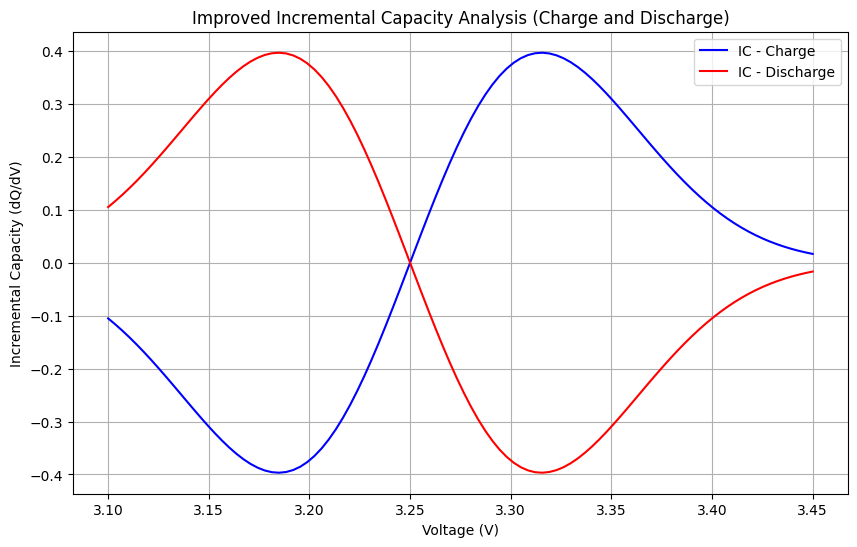

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(voltage_charge, dq_dv_charge, label="IC - Charge", color='blue')
plt.plot(voltage_discharge, dq_dv_discharge, label="IC - Discharge", color='red')
plt.xlabel("Voltage (V)")
plt.ylabel("Incremental Capacity (dQ/dV)")
plt.title("Improved Incremental Capacity Analysis (Charge and Discharge)")
plt.legend()
plt.grid()
plt.show()

In [21]:
# 3D Plot of ICA Peaks with Aging
cycle_count = np.arange(1, 101)  # 100 cycles
ica_peaks_charge = [np.max(dq_dv_charge) - (i * 0.01) for i in range(100)]
ica_peaks_discharge = [np.min(dq_dv_discharge) + (i * 0.01) for i in range(100)]




In [23]:
cycle_count

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [24]:
ica_peaks_charge

[0.39664284574104386,
 0.38664284574104385,
 0.37664284574104384,
 0.3666428457410439,
 0.3566428457410439,
 0.34664284574104387,
 0.33664284574104386,
 0.32664284574104385,
 0.31664284574104384,
 0.30664284574104383,
 0.2966428457410438,
 0.2866428457410439,
 0.27664284574104386,
 0.26664284574104385,
 0.25664284574104385,
 0.24664284574104386,
 0.23664284574104386,
 0.22664284574104385,
 0.21664284574104387,
 0.20664284574104386,
 0.19664284574104385,
 0.18664284574104387,
 0.17664284574104386,
 0.16664284574104385,
 0.15664284574104387,
 0.14664284574104386,
 0.13664284574104385,
 0.12664284574104384,
 0.11664284574104383,
 0.10664284574104388,
 0.09664284574104387,
 0.08664284574104386,
 0.07664284574104385,
 0.06664284574104384,
 0.056642845741043835,
 0.046642845741043826,
 0.03664284574104387,
 0.026642845741043863,
 0.016642845741043855,
 0.006642845741043846,
 -0.003357154258956163,
 -0.013357154258956172,
 -0.023357154258956125,
 -0.033357154258956134,
 -0.04335715425895614,


In [25]:
ica_peaks_discharge

[-0.39664284574104386,
 -0.38664284574104385,
 -0.37664284574104384,
 -0.3666428457410439,
 -0.3566428457410439,
 -0.34664284574104387,
 -0.33664284574104386,
 -0.32664284574104385,
 -0.31664284574104384,
 -0.30664284574104383,
 -0.2966428457410438,
 -0.2866428457410439,
 -0.27664284574104386,
 -0.26664284574104385,
 -0.25664284574104385,
 -0.24664284574104386,
 -0.23664284574104386,
 -0.22664284574104385,
 -0.21664284574104387,
 -0.20664284574104386,
 -0.19664284574104385,
 -0.18664284574104387,
 -0.17664284574104386,
 -0.16664284574104385,
 -0.15664284574104387,
 -0.14664284574104386,
 -0.13664284574104385,
 -0.12664284574104384,
 -0.11664284574104383,
 -0.10664284574104388,
 -0.09664284574104387,
 -0.08664284574104386,
 -0.07664284574104385,
 -0.06664284574104384,
 -0.056642845741043835,
 -0.046642845741043826,
 -0.03664284574104387,
 -0.026642845741043863,
 -0.016642845741043855,
 -0.006642845741043846,
 0.003357154258956163,
 0.013357154258956172,
 0.023357154258956125,
 0.0333571

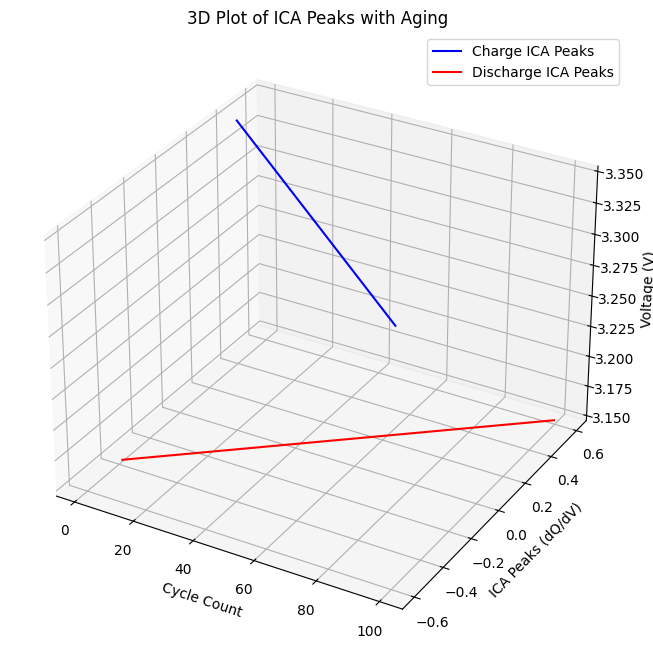

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(cycle_count, ica_peaks_charge, zs=3.35, zdir='z', label="Charge ICA Peaks", color='blue')
ax.plot(cycle_count, ica_peaks_discharge, zs=3.15, zdir='z', label="Discharge ICA Peaks", color='red')
ax.set_xlabel("Cycle Count")
ax.set_ylabel("ICA Peaks (dQ/dV)")
ax.set_zlabel("Voltage (V)")
ax.set_title("3D Plot of ICA Peaks with Aging")
plt.legend()
plt.show()

## Task C: Train a machine learning model to predict the current capacity of a battery cell based on its EIS signature.

In [12]:
#  Predicting Current Capacity
np.random.seed(42)
current_capacity = np.random.uniform(0, 1, 100)

df_ml = pd.DataFrame({
    "Cycle Count": cycle_count,
    "R(Z) (kΩ)": real_impedance,
    "Im(Z) (kΩ)": imag_impedance,
    "Current Capacity": current_capacity
})

X = df_ml[["Cycle Count", "R(Z) (kΩ)", "Im(Z) (kΩ)"]]
y = df_ml["Current Capacity"]
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Example predictions
example_results = []
for idx in range(min(5, len(X_test))):  # Up to 5 examples
    features = X_test.iloc[idx].values.reshape(1, -1)
    actual = y_test.iloc[idx]
    prediction = model.predict(features)[0]
    example_results.append({
        "Example Index": idx,
        "Features": X_test.iloc[idx].to_dict(),
        "Actual Current Capacity": actual,
        "Predicted Current Capacity": prediction,
        "Difference": actual - prediction
    })

example_results_df = pd.DataFrame(example_results)
print(example_results_df)


   Example Index                                           Features  \
0              0  {'Cycle Count': 84.0, 'R(Z) (kΩ)': 7.627002034...   
1              1  {'Cycle Count': 54.0, 'R(Z) (kΩ)': 107.3792820...   
2              2  {'Cycle Count': 71.0, 'R(Z) (kΩ)': 92.66937231...   
3              3  {'Cycle Count': 46.0, 'R(Z) (kΩ)': 79.50267412...   
4              4  {'Cycle Count': 45.0, 'R(Z) (kΩ)': 31.05359779...   

   Actual Current Capacity  Predicted Current Capacity  Difference  
0                 0.063558                    0.056985    0.006573  
1                 0.894827                    0.899861   -0.005033  
2                 0.772245                    0.774791   -0.002546  
3                 0.662522                    0.666140   -0.003618  
4                 0.258780                    0.281514   -0.022734  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


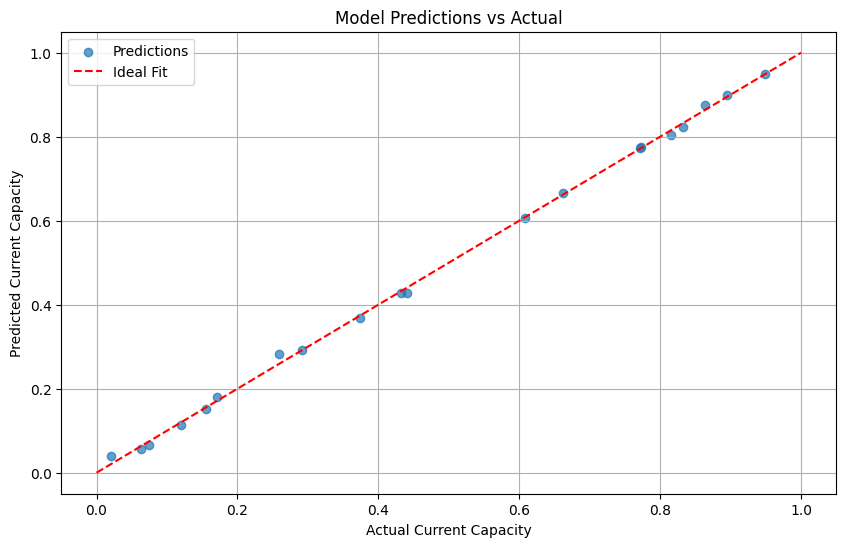

In [15]:
# Full evaluation on test set
predictions = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, label="Predictions")
plt.plot([0, 1], [0, 1], 'r--', label="Ideal Fit")
plt.xlabel("Actual Current Capacity")
plt.ylabel("Predicted Current Capacity")
plt.title("Model Predictions vs Actual")
plt.legend()
plt.grid()
plt.show()

In [16]:
# Metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
print("Model Evaluation (Full Test Set):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Model Evaluation (Full Test Set):
RMSE: 0.0093
MAE: 0.0073
